<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST-Daten-einlesen-und-Daten-verstehen" data-toc-modified-id="MNIST-Daten-einlesen-und-Daten-verstehen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST Daten einlesen und Daten verstehen</a></span></li><li><span><a href="#Mal-beispielhaft-ein-Trainingsbild-anzeigen" data-toc-modified-id="Mal-beispielhaft-ein-Trainingsbild-anzeigen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mal beispielhaft ein Trainingsbild anzeigen</a></span></li><li><span><a href="#Perzeptrongewichtsmatrix-erstellen" data-toc-modified-id="Perzeptrongewichtsmatrix-erstellen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Perzeptrongewichtsmatrix erstellen</a></span></li><li><span><a href="#Aktivierungen-berechnen:-Input-mal-Gewichtsmatrix" data-toc-modified-id="Aktivierungen-berechnen:-Input-mal-Gewichtsmatrix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aktivierungen berechnen: Input mal Gewichtsmatrix</a></span></li><li><span><a href="#Outputs-berechnen" data-toc-modified-id="Outputs-berechnen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Outputs berechnen</a></span></li><li><span><a href="#Fehler-berechnen" data-toc-modified-id="Fehler-berechnen-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fehler berechnen</a></span></li><li><span><a href="#Gewichtsaktualisierungen-berechnen" data-toc-modified-id="Gewichtsaktualisierungen-berechnen-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gewichtsaktualisierungen berechnen</a></span></li><li><span><a href="#Testen-des-Perzeptrons" data-toc-modified-id="Testen-des-Perzeptrons-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Testen des Perzeptrons</a></span></li><li><span><a href="#Perzeptron-Training" data-toc-modified-id="Perzeptron-Training-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Perzeptron Training</a></span></li></ul></div>

# MNIST Daten einlesen und Daten verstehen

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# download and read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.num_examples

55000

In [4]:
mnist.test.num_examples

10000

In [5]:
mnist.validation.num_examples

5000

In [6]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

In [7]:
type(x_train)

numpy.ndarray

In [8]:
x_train.shape

(55000, 784)

In [9]:
28*28

784

In [10]:
y_train.shape

(55000, 10)

In [11]:
y_train

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [12]:
x_test.shape

(10000, 784)

In [13]:
y_test.shape

(10000, 10)

# Mal beispielhaft ein Trainingsbild anzeigen

In [14]:
from random import randint
rnd_img_nr = randint(0,y_train.shape[0]-1)

In [15]:
rnd_img_nr

33213

In [16]:
row_vec = x_train[rnd_img_nr, :]

In [17]:
row_vec.shape

(784,)

In [18]:
M = row_vec.reshape(28, 28)

In [19]:
M.shape

(28, 28)

In [20]:
from matplotlib import pyplot as plt

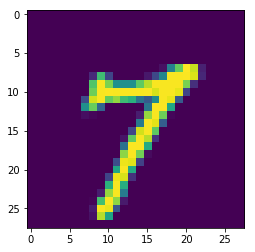

In [21]:
plt.imshow(M)
plt.show()

In [22]:
one_hot_vec = y_train[rnd_img_nr, :]

In [23]:
one_hot_vec

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [24]:
import numpy as np
np.argmax(one_hot_vec)

7

# Perzeptrongewichtsmatrix erstellen

In [25]:
nr_inputs = 28*28 + 1
nr_outputs = 10

In [26]:
W = np.zeros( (nr_inputs, nr_outputs) )

In [27]:
W

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [28]:
W.shape

(785, 10)

In [29]:
low = -1.0
high = +1.0
W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )

In [30]:
W

array([[-0.30069622, -0.36675461,  0.98297572, ..., -0.1597855 ,
         0.15919579, -0.41596775],
       [ 0.5037172 ,  0.32624115,  0.69776288, ...,  0.46923812,
        -0.89340274,  0.54634539],
       [ 0.20028522,  0.87730963,  0.09474434, ...,  0.39395207,
         0.73451607,  0.22613803],
       ..., 
       [-0.82707994,  0.05133836,  0.64910084, ..., -0.87855366,
         0.03263887,  0.72749853],
       [ 0.82309985, -0.18129464, -0.09285639, ...,  0.28341498,
        -0.73279829, -0.8428534 ],
       [-0.11079751,  0.48565324, -0.99844639, ..., -0.50127232,
        -0.0343105 ,  0.85409933]])

In [31]:
W.shape

(785, 10)

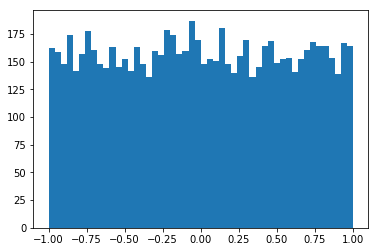

In [32]:
plt.hist(W.reshape(-1), bins=50)
plt.show()

In [33]:
def create_new_perceptron():
    low = -1.0
    high = +1.0
    W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )
    return W

W = create_new_perceptron()

# Aktivierungen berechnen: Input mal Gewichtsmatrix

In [34]:
row_vec.shape

(784,)

In [35]:
type(row_vec)

numpy.ndarray

In [36]:
x = np.append(row_vec,[1])

In [37]:
x

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [38]:
x.shape

(785,)

In [39]:
x.ndim

1

In [40]:
W.shape

(785, 10)

In [41]:
W.ndim

2

In [43]:
# Das folgende ist nicht was wir wollen:
# act = x * W 

In [46]:
act = np.matmul(x, W)

In [47]:
act.shape

(10,)

In [48]:
act

array([ -7.07384118,   8.66146828,   0.72226506,   3.82667779,
         5.02698983,  -0.61564077,  -1.80861494,   8.79772471,
        10.13623489,  -3.22812243])

# Outputs berechnen

In [49]:
# Identity
def f(x):
    return x

In [50]:
# RELU
def f(x):
    if x < 0:
        return 0
    else:
        return x

In [49]:
# Heaviside Funktion
def f(x):
    if x < 0:
        return 0
    else:
        return 1

In [50]:
f = np.vectorize(f, otypes=[float])

In [51]:
y = f(act)

In [52]:
y

array([ 0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.])

Alternative zur Outputberechung über `list comprehension`:

In [50]:
y = [f(x) for x in act]

In [51]:
y = np.array(y)

In [52]:
y

array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.])

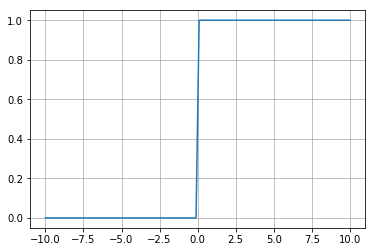

In [53]:
x_values = np.linspace(-10.0,10.0,100)
y_values = [f(x) for x in x_values]
plt.plot(x_values, y_values)
plt.grid()
plt.show()

# Fehler berechnen

In [54]:
y

array([ 0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.])

In [55]:
one_hot_vec

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [56]:
error = one_hot_vec - y

In [57]:
error

array([ 0., -1., -1., -1., -1.,  0.,  0.,  0., -1.,  0.])

In [58]:
alpha = 0.01
alpha * error

array([ 0.  , -0.01, -0.01, -0.01, -0.01,  0.  ,  0.  ,  0.  , -0.01,  0.  ])

# Gewichtsaktualisierungen berechnen

Skalare Gewichtsänderungsberechnung:

In [59]:
for j in range(0, nr_outputs):
    for i in range(0,nr_inputs):
        delta_w = alpha * error[j] * x[i]
        print(delta_w)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.000431372560561
-0.004392157197
-0.00764705955982
-0.01
-0.00917647123337
-0.000901960805058
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00207843154669
-0.00972549080849
-0.00941176533699
-0.00137254908681
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00639215707779
-0.00996078491211
-0.00623529434204
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.000784313753247
-0.00843137323856
-0.00992156922817
-0.00419607877731
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.000117647070438
-0.00701960802078
-0.00996078491211
-0.00831372618675
-0.000705882385373
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00074509806931
-0.00992156922817
-0.00972549080849
-0.00266666680574
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0004

Vektorielle Gewichtsänderungsberechnung:

In [62]:
for j in range(0, nr_outputs):
    delta_w_vector = alpha * error[j] * x
    
    print(delta_w_vector.shape)
    print(delta_w_vector)

(785,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

Durchführung der Gewichtsänderung:

In [63]:
W.shape

(785, 10)

In [64]:
for j in range(0, nr_outputs):
    delta_w_vector = alpha * error[j] * x    
    W[:,j] =  W[:,j] + delta_w_vector

In [65]:
W.shape

(785, 10)

# Testen des Perzeptrons

In [66]:
W.shape

(785, 10)

In [67]:
nr_test_images = x_test.shape[0]

In [68]:
nr_test_images

10000

In [83]:
def test_perceptron(W):
    
    correct = 0
    for test_img_nr in range(0,nr_test_images):
        row_vec = x_test[test_img_nr, :]
        one_hot_vec = y_test[test_img_nr, :]
        gt_label = np.argmax( one_hot_vec )
        #print(gt_label)

        x = np.append(row_vec,[1])

        # Aktivierungen der 10 Outputneurone berechnen
        act = np.matmul(x, W)

        # Outputs aller 10 Outputneurone berechnen
        out = f(act)

        # Was wurde prädiziert?
        is_label = np.argmax( out )

        #print(gt_label, is_label)

        if is_label == gt_label:
            correct += 1     
            
    print("Korrekt: {} von {}".format(correct,nr_test_images))
    
    return correct/nr_test_images

In [84]:
test_perceptron(W)

Korrekt: 6714 von 10000


0.6714

# Perzeptron Training

In [95]:
def train_perceptron(W, nr_train_steps, alpha):
    
    history = []
       
    for train_step_nr in range(0, nr_train_steps):
        
        rnd_img_nr = randint(0,y_train.shape[0]-1)
        
        # Feed Forward
        row_vec = x_train[rnd_img_nr, :]
        one_hot_vec = y_train[rnd_img_nr, :]
        x = np.append(row_vec,[1])
        act = np.matmul(x, W)
        out = f(act)
        
        # Fehlerberechnung
        error = one_hot_vec - out
        
        # Trainingsschritt
        for j in range(0, nr_outputs):
            delta_w_vector = alpha * error[j] * x
            #if train_step_nr % 100 == 0:
            #    print("max weight change", delta_w_vector.max())
            W[:,j] =  W[:,j] + delta_w_vector 
            
        if train_step_nr % 100 == 0:
            print("\nTrain step: ", train_step_nr)
            correct_ratio = test_perceptron(W)
            history.append( correct_ratio )
            
    return history

In [96]:
W = create_new_perceptron()

In [97]:
test_perceptron(W)

Korrekt: 538 von 10000


0.0538

In [98]:
alpha = 0.01
history = train_perceptron(W, 20000, alpha)


Train step:  0
Korrekt: 544 von 10000

Train step:  100
Korrekt: 1392 von 10000

Train step:  200
Korrekt: 1728 von 10000

Train step:  300
Korrekt: 2424 von 10000

Train step:  400
Korrekt: 3132 von 10000

Train step:  500
Korrekt: 3551 von 10000

Train step:  600
Korrekt: 3852 von 10000

Train step:  700
Korrekt: 4171 von 10000

Train step:  800
Korrekt: 4130 von 10000

Train step:  900
Korrekt: 4608 von 10000

Train step:  1000
Korrekt: 4759 von 10000

Train step:  1100
Korrekt: 4723 von 10000

Train step:  1200
Korrekt: 5263 von 10000

Train step:  1300
Korrekt: 4988 von 10000

Train step:  1400
Korrekt: 5350 von 10000

Train step:  1500
Korrekt: 5428 von 10000

Train step:  1600
Korrekt: 5526 von 10000

Train step:  1700
Korrekt: 5687 von 10000

Train step:  1800
Korrekt: 5844 von 10000

Train step:  1900
Korrekt: 5805 von 10000

Train step:  2000
Korrekt: 5766 von 10000

Train step:  2100
Korrekt: 5955 von 10000

Train step:  2200
Korrekt: 6136 von 10000

Train step:  2300
Korre

Korrekt: 7586 von 10000

Train step:  19000
Korrekt: 7679 von 10000

Train step:  19100
Korrekt: 7768 von 10000

Train step:  19200
Korrekt: 7679 von 10000

Train step:  19300
Korrekt: 7487 von 10000

Train step:  19400
Korrekt: 7688 von 10000

Train step:  19500
Korrekt: 7666 von 10000

Train step:  19600
Korrekt: 7774 von 10000

Train step:  19700
Korrekt: 7744 von 10000

Train step:  19800
Korrekt: 7798 von 10000

Train step:  19900
Korrekt: 7870 von 10000


In [99]:
history

[0.0544,
 0.1392,
 0.1728,
 0.2424,
 0.3132,
 0.3551,
 0.3852,
 0.4171,
 0.413,
 0.4608,
 0.4759,
 0.4723,
 0.5263,
 0.4988,
 0.535,
 0.5428,
 0.5526,
 0.5687,
 0.5844,
 0.5805,
 0.5766,
 0.5955,
 0.6136,
 0.5938,
 0.5977,
 0.6191,
 0.6234,
 0.6286,
 0.6522,
 0.6405,
 0.6223,
 0.6432,
 0.6519,
 0.6637,
 0.6611,
 0.6307,
 0.6566,
 0.6569,
 0.6675,
 0.6961,
 0.6857,
 0.6776,
 0.6589,
 0.6949,
 0.6795,
 0.6775,
 0.6557,
 0.6514,
 0.6683,
 0.6937,
 0.6985,
 0.6946,
 0.7035,
 0.6767,
 0.6851,
 0.7065,
 0.7188,
 0.6977,
 0.7019,
 0.7004,
 0.6931,
 0.6847,
 0.6945,
 0.6958,
 0.7226,
 0.7246,
 0.7063,
 0.7266,
 0.7027,
 0.6929,
 0.7178,
 0.708,
 0.6998,
 0.7151,
 0.7118,
 0.7068,
 0.7177,
 0.7218,
 0.701,
 0.7214,
 0.7003,
 0.705,
 0.7154,
 0.7133,
 0.723,
 0.72,
 0.7134,
 0.7076,
 0.7239,
 0.7314,
 0.7262,
 0.7228,
 0.7236,
 0.7442,
 0.741,
 0.7174,
 0.7384,
 0.7299,
 0.7526,
 0.7322,
 0.7299,
 0.7348,
 0.7165,
 0.733,
 0.7263,
 0.7445,
 0.7464,
 0.7339,
 0.7519,
 0.727,
 0.7312,
 0.7434,
 0.

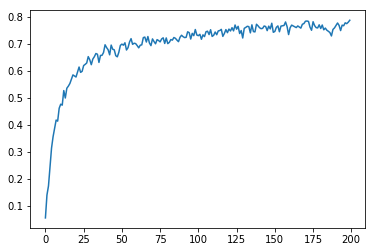

In [100]:
plt.plot(history)
plt.show()